In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import spearmanr, lognorm, kruskal
import io

df = pd.read_excel('salarios.xlsx')

original_column_header_string = df.columns[0]
true_headers = original_column_header_string.split(',')

df_split_data = df.iloc[:, 0].str.split(',', expand=True)

df_split_data.columns = true_headers

df = df_split_data.copy()
display(df.head())

,Empresa,Nota,Salario_Min,Salario_Max,Salario_Medio
0,XP Inc.,4.1,5000,11000,8000
1,Ipiranga,3.9,6000,8000,7000
2,iFood,4.3,6000,7000,7000
3,Itaú Unibanco,4.3,5000,7000,7000
4,PicPay,3.8,5000,7000,6000


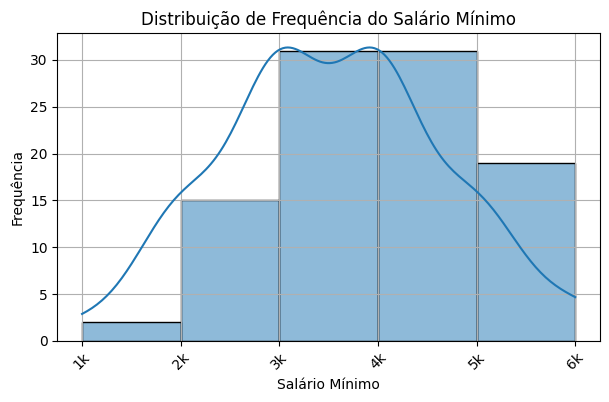

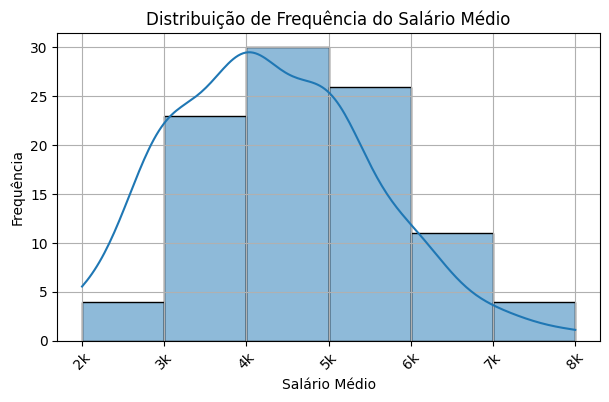

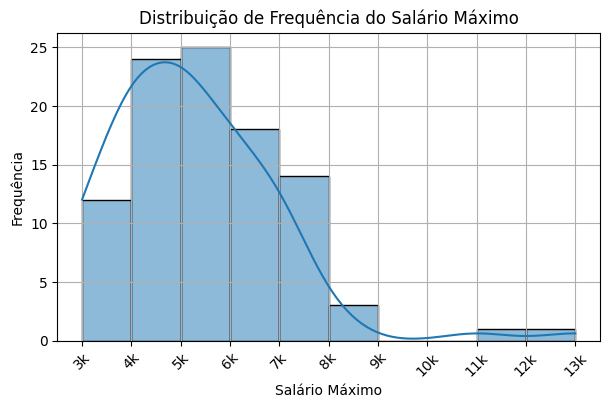

In [10]:


df['Salario_Min'] = pd.to_numeric(df['Salario_Min'], errors='coerce')
df['Salario_Medio'] = pd.to_numeric(df['Salario_Medio'], errors='coerce')
df['Salario_Max'] = pd.to_numeric(df['Salario_Max'], errors='coerce')
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')

df_salaries_clean = df.dropna(subset=['Salario_Min', 'Salario_Medio', 'Salario_Max'])


plt.figure(figsize=(7, 4))
min_sal_min = df_salaries_clean['Salario_Min'].min()
max_sal_min = df_salaries_clean['Salario_Min'].max()
bins_sal_min = np.arange(min_sal_min, max_sal_min + 1000, 1000)
sns.histplot(df_salaries_clean['Salario_Min'], bins=bins_sal_min, kde=True)
plt.title('Distribuição de Frequência do Salário Mínimo')
plt.xlabel('Salário Mínimo')
plt.ylabel('Frequência')
plt.xticks(bins_sal_min, [f'{int(x/1000)}k' for x in bins_sal_min], rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
min_sal_medio = df_salaries_clean['Salario_Medio'].min()
max_sal_medio = df_salaries_clean['Salario_Medio'].max()
bins_sal_medio = np.arange(min_sal_medio, max_sal_medio + 1000, 1000)
sns.histplot(df_salaries_clean['Salario_Medio'], bins=bins_sal_medio, kde=True)
plt.title('Distribuição de Frequência do Salário Médio')
plt.xlabel('Salário Médio')
plt.ylabel('Frequência')
plt.xticks(bins_sal_medio, [f'{int(x/1000)}k' for x in bins_sal_medio], rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
min_sal_max = df_salaries_clean['Salario_Max'].min()
max_sal_max = df_salaries_clean['Salario_Max'].max()
bins_sal_max = np.arange(min_sal_max, max_sal_max + 1000, 1000)
sns.histplot(df_salaries_clean['Salario_Max'], bins=bins_sal_max, kde=True)
plt.title('Distribuição de Frequência do Salário Máximo')
plt.xlabel('Salário Máximo')
plt.ylabel('Frequência')
plt.xticks(bins_sal_max, [f'{int(x/1000)}k' for x in bins_sal_max], rotation=45)
plt.grid(True)
plt.show()

In [4]:
col = "Salario_Medio"
data = df[col].dropna()

rho, p_spear = spearmanr(df["Nota"], df[col])

print("======== Spearman ========")
print("rho =", rho)
print("p-valor =", p_spear)
print()

def bootstrap_ci(data, n_boot=10000, ci=0.95):
    boot_means = []
    n = len(data)
    for _ in range(n_boot):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(sample.mean())

    lower = np.percentile(boot_means, (1-ci)*100/2)
    upper = np.percentile(boot_means, 100 - (1-ci)*100/2)
    return lower, upper, boot_means

lower, upper, boot_dist = bootstrap_ci(data)

print("======== Bootstrap ========")
print(f"IC 95% da média via bootstrap: [{lower:.2f}, {upper:.2f}]")
print()



======== Spearman ========
rho = 0.13750441197800037
p-valor = 0.1769576108521595

======== Bootstrap ========
IC 95% da média via bootstrap: [4071.43, 4551.02]



In [11]:
print("\n===== KRUSKAL–WALLIS =====\n")
df["nota_grupo"] = pd.qcut(df["Nota"], q=4, labels=["Q1","Q2","Q3","Q4"])

grupos = [df[df["nota_grupo"] == g]["Salario_Medio"] for g in ["Q1","Q2","Q3","Q4"]]

H, p = kruskal(*grupos)

print(f"H = {H}")
print(f"p-valor = {p}")


===== KRUSKAL–WALLIS =====

H = 3.541793183475428
p-valor = 0.31538200096405583


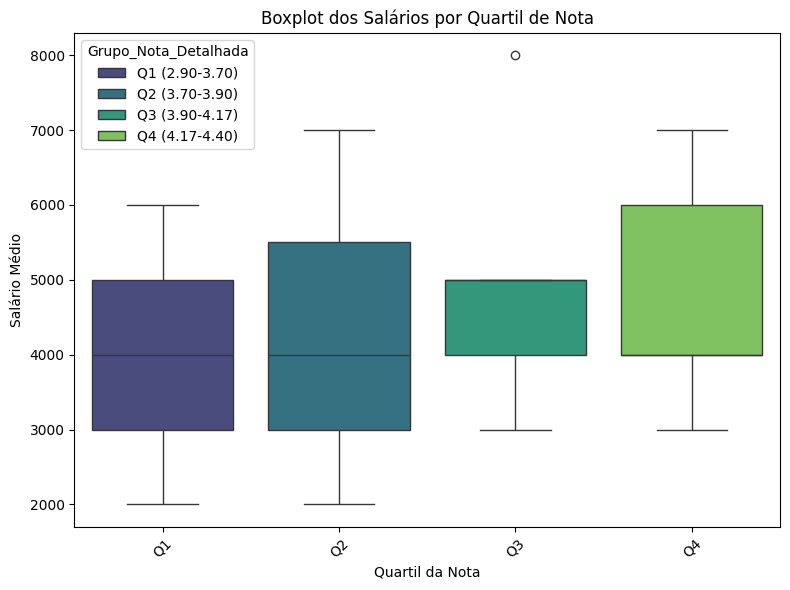

In [12]:
nota_quantiles = df['Nota'].quantile([0.0, 0.25, 0.50, 0.75, 1.0])

detailed_labels = [
    f"Q1 ({nota_quantiles[0.0]:.2f}-{nota_quantiles[0.25]:.2f})",
    f"Q2 ({nota_quantiles[0.25]:.2f}-{nota_quantiles[0.50]:.2f})",
    f"Q3 ({nota_quantiles[0.50]:.2f}-{nota_quantiles[0.75]:.2f})",
    f"Q4 ({nota_quantiles[0.75]:.2f}-{nota_quantiles[1.0]:.2f})"
]

simple_labels = ["Q1", "Q2", "Q3", "Q4"]

df["Grupo_Nota_Detalhada"] = pd.qcut(df["Nota"], q=4, labels=detailed_labels)

df["Grupo_Nota_EixoX"] = pd.qcut(df["Nota"], q=4, labels=simple_labels)

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Grupo_Nota_EixoX", y="Salario_Medio", hue="Grupo_Nota_Detalhada", palette="viridis", legend=True)
plt.title("Boxplot dos Salários por Quartil de Nota")
plt.xlabel("Quartil da Nota")
plt.ylabel("Salário Médio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
